<a href="https://colab.research.google.com/github/KaissonFerreira/Basic_Projects_To_Learn/blob/main/Projeto_1/Preven%C3%A7%C3%A3o_de_vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

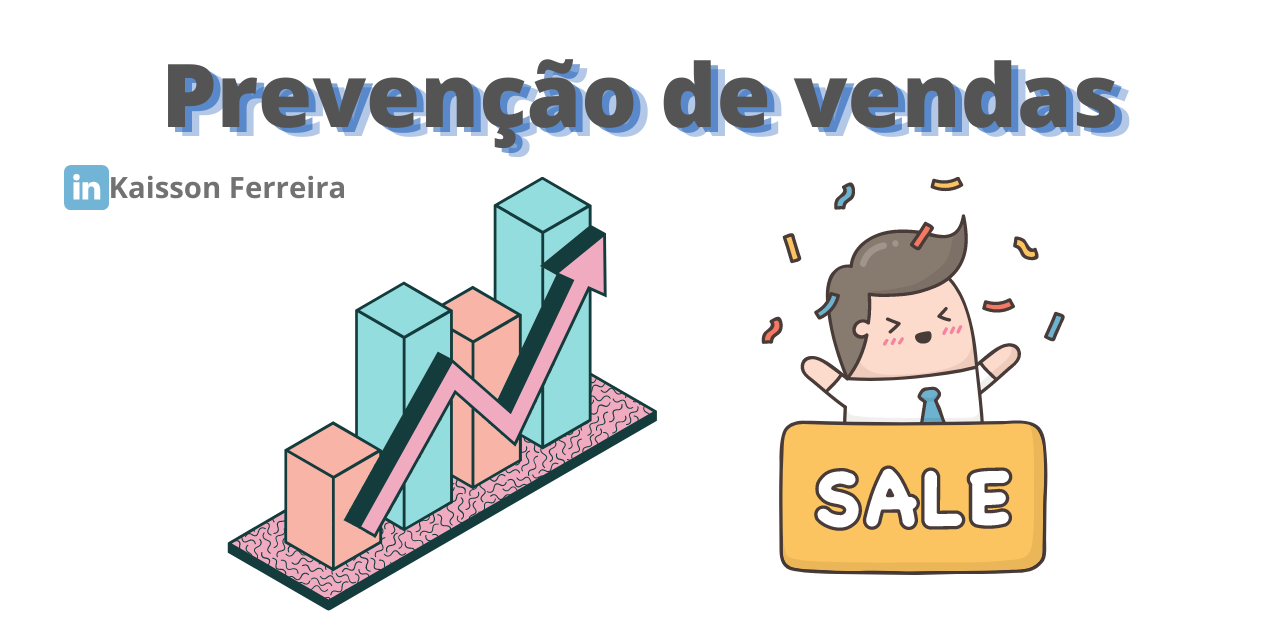


# Prevenção de vendas 
---
* Nosso desafio é conseguir prever as vendas que vamos ter em um determinado período com base nos gastos em anúncios nas 3 grandes empresas que a empresa Hashtag investe: TV, jornal e rádio.








###**Passo a passo de um projeto de dados** :



1.   Entendimento do desafio
2.   Entendimento da área/empresa
3.   Extração/Obtenção de dados
4.   Ajuste de dados (tratamento/limpeza)
5.   Análise exploratória
6.   Modelagem + algorítmos (modelos de machine learning)
7.   Interpretação de resultados




### Obtenção dos dados:

In [16]:
import pandas as pd
url = 'https://github.com/KaissonFerreira/Basic_Projects_To_Learn/raw/main/Projeto_1/advertising.csv'
tabela = pd.read_csv(url)

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [17]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB





##**Análise exploratória**



*   Vamos tentar visualizar como as informações de cada item estão distribuídas
*   Vamos ver a correlação entre cada um dos itens



Bibliotecas que devem ser utilizadas para utilização de gráficos:

* Seaborn
* Matplotlib
* Plotly


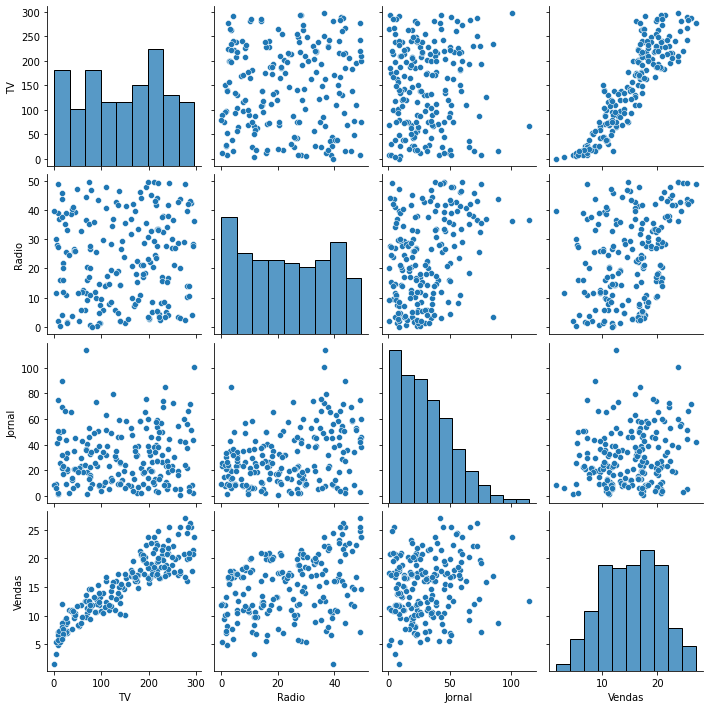

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(tabela)
plt.show()





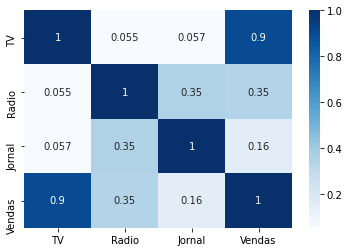

In [19]:
sns.heatmap(tabela.corr(), cmap = 'Blues', annot= True) #annot = True indica os números de correlação e tabela.corr() indica as correlações
plt.show()

## **Aplicação do modelo de Machine Learning**

**Com isso, podemos partir para a preparação dos dados para treinarmos o modelo de machine learning**

* Separando em dados de treino e dados de teste:


In [27]:
from sklearn.model_selection import train_test_split

x = tabela.drop('Vendas' , axis= 1)     #Valores que devem ser usados para fazer a previsão (tv, rádio e jornal)
# axis = 1 -> Coluna e axis = 0 -> Linha
y = tabela ['Vendas']     #Valor que eu quero calcular (vendas)

x_treino,x_teste,y_treino,y_teste = train_test_split (x,y, test_size = 0.3)



Se for uma categoria, temos um problema de classificação - classificar as informações, e se for para descobrir um número, temos um problema de regressão.

**Temos um problema de regressão - Vamos escolher os modelos que vamos usar:**

* Regressão linear
* RamdomForest (Árvore de Decisão)


In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#Criar a inteligência artificial
linear = LinearRegression()
ramdomforest = RandomForestRegressor()

# Treinar a inteligência artificial. Criando dois modelos para saber qual é o melhor. (Para cada problema existe um tipo de modelo)
linear.fit(x_treino,y_treino) # .fit() serve para treinar os dados 
ramdomforest.fit(x_treino,y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### Avaliação do modelo:

**Teste da IA e a avaliação de qual é a melhor:**

* Vamos usar o R² -> diz a % que o nosso modelo consegue explicar o que acontece.
* Também vamos olhar o MSE ( Erro quadrático médio) -> Diz o quanto nosso modelo erra ao fazer uma previsão.


In [29]:
from sklearn import metrics

# Previsão para cada modelo utilizando os dados da variável de teste
teste_linear = linear.predict(x_teste)
teste_randomforest = ramdomforest.predict(x_teste)

# Utilizando duas métricas para a avaliar a acurácia e assertividade dos modelos de machine learning
# R2
r2_linear = metrics.r2_score(y_teste,teste_linear)
r2_radomforest = metrics.r2_score(y_teste,teste_randomforest)
print(r2_linear,r2_radomforest)
# Erro Quadrático médio

erro_linear = metrics.mean_squared_error (y_teste,teste_linear)
erro_ramdom = metrics.mean_squared_error (y_teste,teste_randomforest)

print (erro_linear,erro_ramdom)

0.893748437454497 0.9359245739883171
3.2764156832781506 1.9758554666666612


É observado que o erro quadrático médio do modelo RamdomForest (Árvore de decisão) é menor que a regressão linear, e o R² é mais confiável para o modelo de Ramdom. Assim, o modelo preditivo da árvore de decisão é o mais assertivo.

**Visualização gráfica das previsões**

In [30]:
# Criando uma tabela vazia
tabela_comparação= pd.DataFrame()
tabela_comparação['Vendas Reais']=y_teste
tabela_comparação['Previsão Random']=teste_randomforest
tabela_comparação = tabela_comparação.reset_index(drop= True) # Reinicia o índice e coloca-os em ordem


display(tabela_comparação)

,Vendas Reais,Previsão Random
0,23.7,23.140
1,22.6,22.455
2,20.9,17.836
3,20.7,20.097
4,18.3,18.439
5,5.3,4.333
6,20.6,18.574
7,16.0,20.251
8,6.9,8.182
9,16.9,18.320


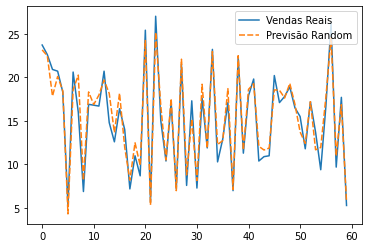

In [31]:
sns.lineplot(data= tabela_comparação)
plt.show()

### Interpretação dos resultados: 

**Qual a importância de cada variável para as vendas?**


In [32]:
print(ramdomforest.feature_importances_)
# mostra a ordem da importância

[0.85693209 0.12896114 0.01410677]


Significa que a TV é a variável mais importantes para o volume de vendas e o jornal é o menos significativo.

**Será que estamos investindo certo?**

In [33]:
print(tabela[['Radio','Jornal']].sum())

Radio     4652.8
Jornal    6110.8
dtype: float64


Está sendo mais gasto em Jornal do que Radio, e como o Radio se demonstra mais interessante para o volume de vendas, estamos investindo errado.